In [2]:
using CSV
using DataFrames
using Random
using Glob
using Gadfly
import Cairo, Fontconfig
ENV["COLUMNS"] = 1000;

┌ Info: Precompiling Glob [c27321d9-0574-5035-807b-f59d2c89b15c]
└ @ Base loading.jl:1278
┌ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
└ @ Base loading.jl:1278
┌ Info: Precompiling Fontconfig [186bb1d3-e1f7-5a2c-a377-96d770f13627]
└ @ Base loading.jl:1278


In [3]:
fns_a = glob("*.csv", "../../../../results/2020-11-01/experiment44a/")
dfs_a = [DataFrame(CSV.File(fn)) for fn in fns_a]
results_exp44a = vcat(dfs_a...);

In [4]:
fns_b = glob("*.csv", "../../../../results/2020-11-01/experiment44b/")
dfs_b = [DataFrame(CSV.File(fn)) for fn in fns_b]
results_exp44b = vcat(dfs_b...);

In [5]:
fns_c = glob("*.csv", "../../../../results/2020-11-01/experiment44c/")
dfs_c = [DataFrame(CSV.File(fn)) for fn in fns_c]
results_exp44c = vcat(dfs_c...);

In [6]:
function get_match_ratio_colorid(x)
    if x == 1.0
        return 4
    elseif x >= 0.85
        return 3
    elseif x >= 0.5
        return 2
    else
        return 1
    end
end
results_exp44a.match_color = map(get_match_ratio_colorid, results_exp44a.match_ratio);
results_exp44b.match_color = map(get_match_ratio_colorid, results_exp44b.match_ratio);
results_exp44c.match_color = map(get_match_ratio_colorid, results_exp44c.match_ratio);

In [5]:
@show nrow(results_exp44a)
first(results_exp44a, 3)

nrow(results_exp44a) = 41


,N,n,m,μ,σ,ρe,ρh,ρt,match_ratio,alignment_strength_1,alignment_strength_2,iter,maxiter,sgm_time,distribution,experiment,match_color
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,String,String,Int64
1,1250,1000,250,0.459632,0.0580002,0.0,0.0135444,0.0135444,0.0,0.113266,0.116096,20,20,23.8854,bernoulli,44a,1
2,1250,1000,250,0.459632,0.0580002,0.025,0.0135444,0.0382058,0.003,0.110931,0.116241,20,20,25.3542,bernoulli,44a,1
3,1250,1000,250,0.459632,0.0580002,0.05,0.0135444,0.0628672,0.013,0.109793,0.116686,20,20,26.3675,bernoulli,44a,1


In [6]:
@show nrow(results_exp44c)
first(results_exp44c, 3)

nrow(results_exp44c) = 328


,N,n,m,μ,ρe,ρh,ρt,σ,ρh_mod,ρt_mod,σ2_mod,match_ratio,alignment_strength_1,alignment_strength_2,iter,maxiter,sgm_time,distribution,experiment,match_color
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,String,String,Int64
1,1250,1000,250,0.459603,0.0,0.0168704,0.0168704,0.0647307,0.00334491,0.00334491,0.000830769,0.002,0.111106,0.115295,20,20,25.3093,bernoulli,44b,1
2,1250,1000,250,0.459602,0.0,0.0215673,0.0215673,0.073189,0.00801492,0.00801492,0.00199065,0.002,0.112299,0.116149,20,20,24.1637,bernoulli,44b,1
3,1250,1000,250,0.459826,0.0,0.0844438,0.0844438,0.144826,0.0709843,0.0709843,0.0176315,0.087,0.111608,0.119736,20,20,20.785,bernoulli,44b,1


In [7]:
defaultfont = "CMU Serif";
fontstyles = (
    key_title_font = defaultfont,
    key_label_font = defaultfont,
    minor_label_font = defaultfont,
    major_label_font = defaultfont,
    key_title_font_size = 14px,
    key_label_font_size = 12px,
    minor_label_font_size = 14px,
    major_label_font_size = 16px,
);

In [8]:
colors = [colorant"red", colorant"darkblue", colorant"deepskyblue", colorant"green"]

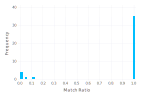

In [9]:
plot(
    results_exp44a,
    x = :match_ratio,
    Geom.histogram,
    Guide.ylabel("Frequency"),
    Guide.xlabel("Match Ratio"),
    Guide.xticks(ticks=0:0.1:1),
    Coord.cartesian(xmin=0, xmax=1),
    style(
        ;fontstyles...,
    ),
) |> SVG()

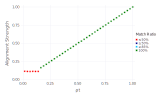

In [27]:
fig1 = plot(
    results_exp44a,
    x = :ρt, y = :alignment_strength_1, color = :match_color,
    Guide.xlabel("ρt"),
    Guide.ylabel("Alignment Strength"),
    Guide.xticks(ticks=0:0.25:1),
    Guide.yticks(ticks=0:0.25:1),
    Scale.color_discrete_manual(colors..., levels=[1,2,3,4]),
    Guide.colorkey(title="Match Ratio", labels=["≤50%", "≥50%", "≥85%", "100%"]),
    style(
        ;fontstyles...,
    ),
)
fig1 |> SVG(16cm, 10cm)
fig1 |> PGF("exp44_fig1.tex", 16cm, 10cm, texfonts=true);

In [30]:
nrow(results_exp44c)

328

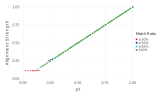

In [9]:
fig2 = plot(
    results_exp44c,
    x = :ρt, y = :alignment_strength_1, color = :match_color,
    Guide.xlabel("ρt"),
    Guide.ylabel("Alignment Strength"),
    Guide.xticks(ticks=0:0.25:1),
    Guide.yticks(ticks=0:0.25:1),
    Scale.color_discrete_manual(colors..., levels=[1,2,3,4]),
    Guide.colorkey(title="Match Ratio", labels=["≤50%", "≥50%", "≥85%", "100%"]),
    style(
        highlight_width=0.5px,
        point_size=0.5mm,
        ;fontstyles...,
    ),
)
fig2 |> SVG(16cm, 10cm)
# fig2 |> PGF("exp44_fig2.tex", 16cm, 10cm, texfonts=true);

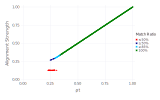

In [50]:
fig3 = plot(
    results_exp44b,
    x = :ρt, y = :alignment_strength_1, color = :match_color,
    Guide.xlabel("ρt"),
    Guide.ylabel("Alignment Strength"),
    Guide.xticks(ticks=0:0.25:1),
    Guide.yticks(ticks=0:0.25:1),
    Scale.color_discrete_manual(colors..., levels=[1,2,3,4]),
    Guide.colorkey(title="Match Ratio", labels=["≤50%", "≥50%", "≥85%", "100%"]),
    style(
        highlight_width=0px,
        point_size=0.6mm,
        ;fontstyles...,
    ),
)
fig3 |> SVG(16cm, 10cm)
fig3 |> PGF("exp44_fig3.tex", 16cm, 10cm, texfonts=true);